In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves,radviz
import math as ma
import random
from scipy.stats import norm  

C:\Users\JUHI\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#df1 has data for 10am to 5pm (dustbin will fill very less)
df1 = pd.DataFrame(abs(np.random.uniform(50,60,size=(8,1))),columns=['1'],index=['10','11','12','13','14','15','16','17'])
df1=df1.sort_values(by=['1'],ascending=[True])
df1 = df1.reset_index(drop=True)
df1.index=['10','11','12','13','14','15','16','17']
#df1 = df1.reset_index(drop=True)
#df1 = pd.DataFrame(data=d)
#d=df[[busy(i),busy(i),busy(i)] for i in range(1,10)]
#d = df[[p, p.team, p.passing_att, p.passer_rating()] for p in game.players.passing()]
#df1 = pd.DataFrame(np.random.normal(100,5,size=(24,3)), columns=['7','8','9'])


In [4]:
#df2 has data from 7am to 9am (dustbin will fill with great speed)
df2 = pd.DataFrame(abs(np.random.uniform(5,50,size=(3,1))),columns=['1'],index=['7','8','9'])
df2=df2.sort_values(by=['1'],ascending=[True])
df2 = df2.reset_index(drop=True)
df2.index=['7','8','9']

In [5]:
#df3 has data from 6pm tp 8pm (dustbin will fill with great speed)
df3 = pd.DataFrame(abs(np.random.uniform(61,96,size=(3,1))),columns=['1'],index=['18','19','20'])
df3=df3.sort_values(by=['1'],ascending=[True])
df3 = df3.reset_index(drop=True)
df3.index=['18','19','20']


In [6]:
#df4 has data from 9pm to 6am (dustbin will not fill at all therfore same constant height of 96)
df4 = pd.DataFrame('96',columns=['1'],index=['21','22','23','24','1','2','3','4','5','6'])
#df4=df4.sort_values(by=['height'],ascending=[True])
#df4=df4.reindex(index=['21','22','23','24','1','2','3','4','5','6'])


In [7]:
#concatenating all dataframes to make one dataframe
#converting all decimal to integer
frames=[df2,df1,df3,df4]
df=pd.concat(frames)
df['1']=df['1'].astype(int)
df= df.reset_index()

In [9]:
df.dtypes

index    object
1         int32
dtype: object

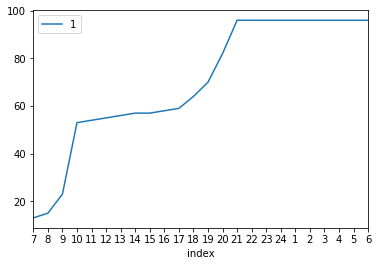

In [8]:
#plotting day1
df.plot(x='index',y='1')
#plt.xticks(list(df.index))
plt.xticks(df.index, df['index'])
plt.show()

In [9]:
#adding multiple columns to dataframe to make a complete dataset for 90 days 
#multiple columns are made by adding or subtracting values from 1st column
for i in range(2,90):
    dfn=pd.DataFrame()
    dfn[i]=abs(df['1']+random.randint(-5,5))
    dfn=dfn.sort_values(by=i,ascending=[True])
    df=pd.concat([df,dfn],axis=1)

In [10]:
df=df.rename(columns={"index": "hours"})
#df=df.transpose()
df.head()

,hours,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,7,13,9,14,14,14,9,15,18,8,...,17,8,13,11,12,9,18,17,8,8
1,8,15,11,16,16,16,11,17,20,10,...,19,10,15,13,14,11,20,19,10,10
2,9,23,19,24,24,24,19,25,28,18,...,27,18,23,21,22,19,28,27,18,18
3,10,53,49,54,54,54,49,55,58,48,...,57,48,53,51,52,49,58,57,48,48
4,11,54,50,55,55,55,50,56,59,49,...,58,49,54,52,53,50,59,58,49,49


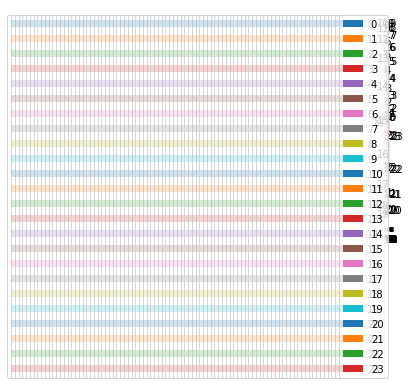

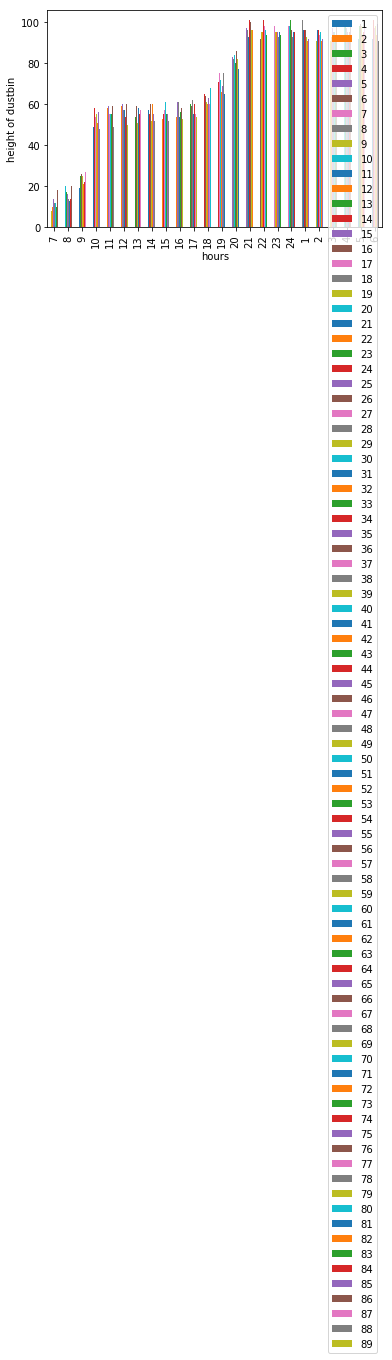

In [18]:
#plotting all the dataset values
#constant value from 21-6, sudden increase from 7-9 and 17-20
ax=df.plot(x='hours',kind='bar')
plt.xticks(df.index, df['hours'])
ax.set_ylabel("height of dustbin")
ax.set_xlabel("hours")
plt.show()